[Probability and Statistics for Data Science](https://www.ps4ds.net/) 

Code for Example 6.3 and Figure 6.5

Analysis of height data from a population consisting of both men and women.\
Topics: Mixture model, Gaussian parametric model, joint distribution of discrete and continuous variables, marginal distributions, conditional distributions 

Author: Carlos Fernandez-Granda\
Data source: http://mreed.umtri.umich.edu/mreed/downloads.html

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
from scipy.stats import norm

data_men = pd.read_csv ("../data/ANSUR II MALE Public.csv", encoding='latin-1')
data_women = pd.read_csv ("../data/ANSUR II FEMALE Public.csv", encoding='latin-1')

font_size = 15
font_size_legend = 15
font_size_ticks = 15

stature_men = data_men['stature'] / 10.
stature_women = data_women['stature'] / 10.
stature_all = np.concatenate((stature_men,stature_women))

print("Number of mean", len(stature_men))
print("Number of women", len(stature_women))

Number of mean 4082
Number of women 1986


0.6727092946605142


Text(0.5, 0, 'Sex')

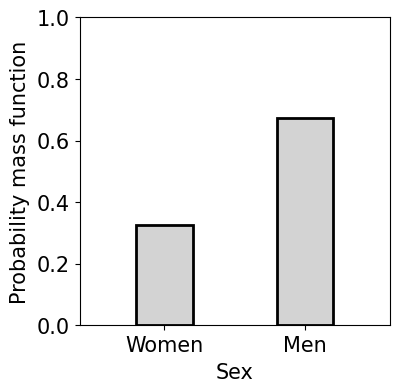

In [29]:
xmin = -0.6
xmax = 1.6
vals = [0,1]
ymax = 1

p_men = float(len(stature_men) ) / float(len(stature_all))
marginal_pmf = [1-p_men,p_men]
print(p_men)

plt.figure(figsize=(4,4))
plt.bar(vals,marginal_pmf, width = 0.4, color = "lightgray", edgecolor="black",linewidth = 2)
plt.xticks(np.arange(0, 1+1, 1),["Women","Men"])
plt.xticks(fontsize=font_size) 
plt.yticks(fontsize=font_size_ticks)
plt.ylim([0,ymax])
plt.xlim([xmin,xmax])
plt.ylabel("Probability mass function",fontsize=font_size,labelpad = 5)
plt.xlabel("Sex",fontsize=font_size,labelpad = 5)

Women -- Mean: 162.85 Standard deviation: 6.42
Men -- Mean: 175.62 Standard deviation: 6.85


Text(0.5, 1.0, 'Gaussian mixture model')

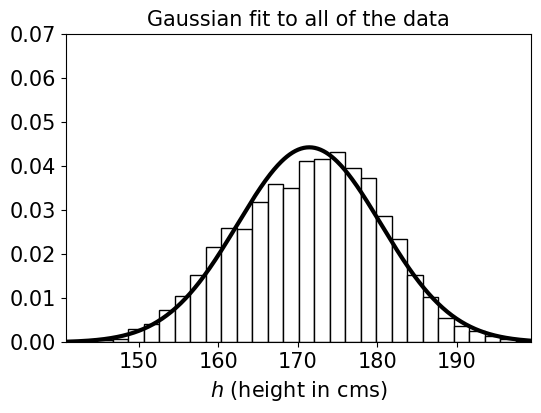

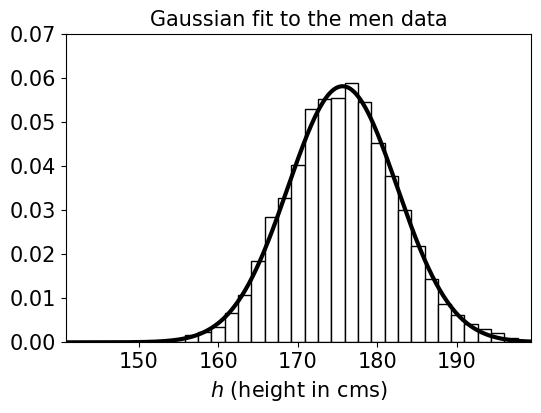

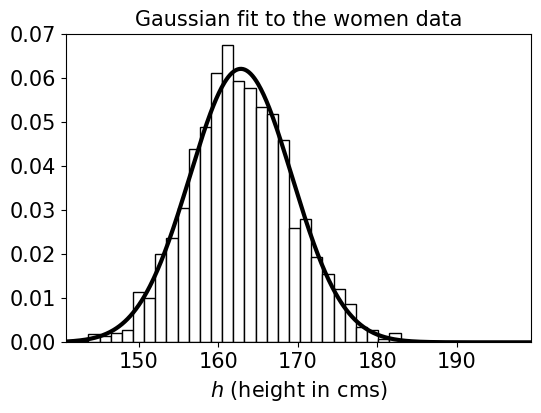

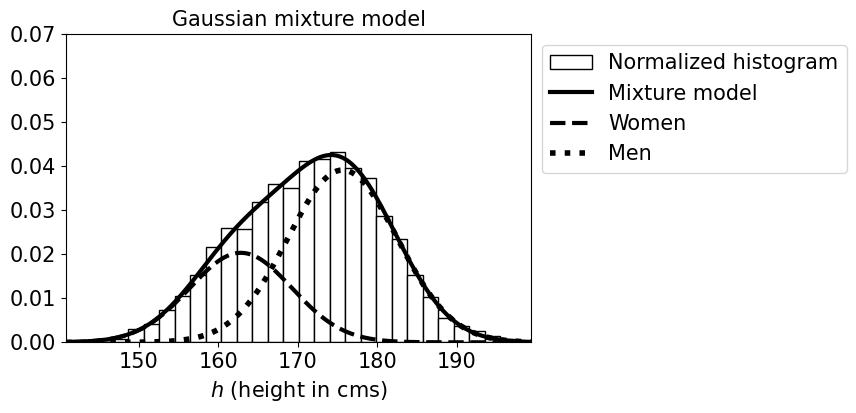

In [30]:
# Fitting a Gaussian mixture model by fitting a Gaussian parametric model to the data of each sex separately

# Maximum-likelihood estimates of Gaussian parameters
mu_all = np.mean(stature_all)
sigma_all = np.std(stature_all)
mu_men = np.mean(stature_men)
sigma_men = np.std(stature_men)
mu_women = np.mean(stature_women)
sigma_women = np.std(stature_women)

print("Women -- Mean: " + str(np.round(mu_women,2)) + " Standard deviation: " + str(np.round(sigma_women,2)))
print("Men -- Mean: " + str(np.round(mu_men,2)) + " Standard deviation: " + str(np.round(sigma_men,2)))

n_bins = 30

y_max_counts= 550

plt.figure(figsize=(6,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature_all,bins=n_bins,color='white', edgecolor='black',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,norm.pdf(h,mu_all,sigma_all),lw=3,color="black",label='Gaussian model')
plt.ylim([0,y_max])
plt.xlim([hmin,hmax])
plt.xlabel('$h$ (height in cms)',fontsize=font_size,labelpad=5)
plt.title("Gaussian fit to all of the data",fontsize=font_size)

plt.figure(figsize=(6,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature_men,bins=n_bins,color='white', edgecolor='black',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,norm.pdf(h,mu_men,sigma_men),lw=3,color="black",label='Gaussian model')
plt.ylim([0,y_max])
plt.xlim([hmin,hmax])
plt.xlabel('$h$ (height in cms)',fontsize=font_size,labelpad=5)
plt.title("Gaussian fit to the men data",fontsize=font_size)

plt.figure(figsize=(6,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature_women,bins=n_bins,color='white', edgecolor='black',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,norm.pdf(h,mu_women,sigma_women),lw=3,color="black",label='Gaussian model')
plt.ylim([0,y_max])
plt.xlim([hmin,hmax])
plt.xlabel('$h$ (height in cms)',fontsize=font_size,labelpad=5)
plt.title("Gaussian fit to the women data",fontsize=font_size)

# Marginal pdf of the height for the mixture model
marginal_pdf = p_men*norm.pdf(h,mu_men,sigma_men)+(1-p_men)*norm.pdf(h,mu_women,sigma_women)

plt.figure(figsize=(6,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
plt.hist(stature_all,bins=n_bins,color='white', edgecolor='black',
          linewidth=1,density=True,label='Normalized histogram')
plt.plot(h,marginal_pdf,lw=3,color="black",label='Mixture model')
plt.plot(h,(1-p_men)*norm.pdf(h,mu_women,sigma_women),lw=3,color="black",ls="dashed",label='Women')
plt.plot(h,p_men*norm.pdf(h,mu_men,sigma_men),lw=4,color="black",ls="dotted",label='Men')
plt.ylim([0,y_max])
plt.xlim([hmin,hmax])
plt.xlabel('$h$ (height in cms)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size,bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.title("Gaussian mixture model",fontsize=font_size)

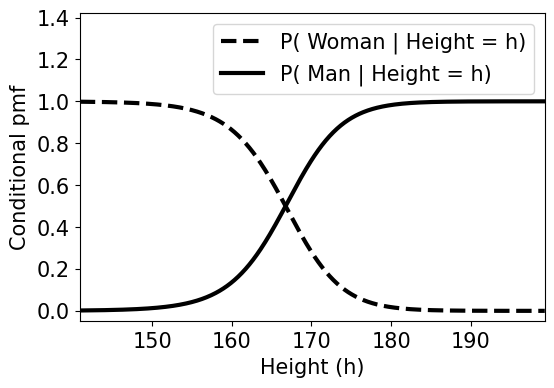

In [31]:
# Conditional pmf of height for the Gaussian mixture model
women_given_stature = (1-p_men)*norm.pdf(h,mu_women,sigma_women) / marginal_pdf
men_given_stature =  p_men*norm.pdf(h,mu_men,sigma_men) / marginal_pdf

plt.figure(figsize=(6,4))
plt.xticks(fontsize=font_size_ticks) 
plt.yticks(fontsize=font_size_ticks)
#sns.kdeplot(temperature_1,bw=bw,color="black",lw=3,gridsize=1000, legend = False)#,color='white', edgecolor='black',linewidth=2)
plt.plot(h,women_given_stature,color="black",lw=3,ls="dashed",label='P( Woman | Height = h)')
plt.plot(h,men_given_stature,color="black",lw=3,label='P( Man | Height = h)')
plt.xlim([hmin,hmax])
plt.ylim([-0.05,1.42])
plt.ylabel(r"Conditional pmf",fontsize=font_size,labelpad=5)
plt.xlabel('Height (h)',fontsize=font_size,labelpad=5)
plt.legend(fontsize=font_size)